# This Method uses Cash-Karp Method !

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline 


## Coupled Derivative to Intergrate


In [26]:
def dydx(x,y):
    
    A = 1
    B = 0.5
    C = 1.46
    D = 2/3
    
    y_derivs = np.zeros(2)
    
    y_derivs[0] = y[1]
    
    y_derivs[1] = -A*np.sin(y[0]) - B*y[1] + C*np.sin(D*x)
    
    return y_derivs

## 4th Order RK Method 

In [27]:
def rk4_mv_core(dydx,xi,yi,nv,h):
    
    k1 = np.zeros(nv)
    k2 = np.zeros(nv)
    k3 = np.zeros(nv)
    k4 = np.zeros(nv) 
    k5 = np.zeros(nv)
    k6 = np.zeros(nv)
    
    x_ipo = xi + h 
    
    y_temp2 = np.zeros(nv)
    y_temp3 = np.zeros(nv)
    y_temp4 = np.zeros(nv)
    y_temp5 = np.zeros(nv)
    y_temp6 = np.zeros(nv)
    
    y_derivs = dydx(xi,yi)
    k1[:] = h*y_derivs[:] 
    
    
    y_temp2[:] = yi[:] + (1/5)*k1[:]
    y_derivs = dydx(xi + (1/5)*h, y_temp2) 
    k2[:] = h*y_derivs[:] 
    
    
    y_temp3[:] = yi[:] + (3/40)*k1[:] + (9/40)*k2[:]
    y_derivs = dydx(xi + (3/10)*h, y_temp3)
    k3[:] = h*y_derivs[:]
    
    
    y_temp4[:] = yi[:] + (3/10)*k1[:] + -1*(9/10)*k2[:] + (6/5)*k3[:] 
    y_derivs = dydx(xi + (3/5)*h, y_temp4)
    k4[:] = h*y_derivs[:]
    
    
    y_temp5[:] = yi[:] + -1*(11/54)*k1[:] + (5/2)*k2[:] + -1*(70/27)*k3[:] + (35/27)*k4[:]
    y_derivs = dydx(xi + h, y_temp5)
    k5[:] = h*y_derivs[:]
    
    
    y_temp6[:] = yi[:] + (1631/55296)*k1[:] + (175/512)*k2[:] + (575/13824)*k3[:] + (44275/110592)*k4[:] + (253/4096)*k5[:]
    y_derivs = dydx(xi + (7/8)*h, y_temp6)
    k6[:] = h*y_derivs[:]
    
    
    yipo = yi + (37/378)*k1 + (0)*k2 + (250/621)*k3 + (125/594)*k4 + (0)*k5 + (512/1771)*k6
    
    return yipo 

## Adaptive Step Size for RK4

In [28]:
def rk4_mv_ad(dydx,x_i,y_i,nv,h,tol):
    
    SAFETY = 0.9 
    H_NEW_FAC = 2.0 
    
    imax = 10000
    
    i = 0
    
    Delta = np.full(nv,2*tol) 
    
    h_step = h 
    
    while(Delta.max()/tol > 1.0):
        
        y_2 = rk4_mv_core(dydx,x_i,y_i,nv,h_step)
        y_1 = rk4_mv_core(dydx,x_i,y_i,nv,0.5*h_step)
        y_11 = rk4_mv_core(dydx,x_i+0.5*h_step,y_1,nv,0.5*h_step)
        
        Delta = np.fabs(y_2 - y_11)
        
        if(Delta.max()/tol > 1.0):
            h_step *= SAFETY * (Delta.max()/tol)**(-0.25)
            
        if(i>=imax):
            print('Too many iterations in rk4_mv_ad()' )
            raise StopIteration ("Ending after i =",i)
            
        i += 1 
            
    h_new = np.fmin(h_step * (Delta.max()/tol)**(-0.9), h_step*H_NEW_FAC)
        
    return y_2, h_new, h_step
                        

## Wrapper for RK4

In [29]:
def rk4_mv(dydx,a,b,y_a,tol):
    
    xi = a 
    yi = y_a.copy()
    
    h = 1.0e-4 * (b-a) 
    
    imax = 10000
    
    i = 0 
    
    nv = len(y_a) 
    
    x = np.full(1,a)
    y = np.full((1,nv),y_a)
    
    flag = 1
    
    while(flag): 
        
        yi_new, h_new, h_step = rk4_mv_ad(dydx,xi,yi,nv,h,tol)
        
        h = h_new
        
        if(xi+h_step>b):
            
            h = b-xi
            
            yi_new, h_new, h_step = rk4_mv_ad(dydx,xi,yi,nv,h,tol)
            
            flag = 0 
            
        xi += h_step 
        yi[:] = yi_new[:]
        
        x = np.append(x,xi)
        y_new = np.zeros((len(x),nv))
        y_new[0:len(x)-1,:] = y
        y_new[-1,:] = yi[:]
        del y 
        y = y_new
        
        if(i>=imax): #missing = !!!!!
            
            print("Maximum iterations reached.")
            raise StopIteration("Iteration number = ",i)
            
        i += 1
        
        s = "i = %3d\tx = %9.8f\th = %9.8f\tb=%9.8f" % (i,xi,h_step,b)
        print(s)
        
        if(xi==b):
            flag = 0 
            
    return x,y # indented inside fxn
    

## Performing the Itergations 



In [30]:
a = 0.0 
b = 100.0

y_0 = np.zeros(2) 
y_0[0] = 0.0 
y_0[1] = 1.0 
nv = 2

tolerance = 1.0e-6

x,y = rk4_mv(dydx,a,b,y_0,tolerance)

i =   1	x = 0.01000000	h = 0.01000000	b=100.00000000
i =   2	x = 0.03000000	h = 0.02000000	b=100.00000000
i =   3	x = 0.07000000	h = 0.04000000	b=100.00000000
i =   4	x = 0.15000000	h = 0.08000000	b=100.00000000
i =   5	x = 0.31000000	h = 0.16000000	b=100.00000000
i =   6	x = 0.63000000	h = 0.32000000	b=100.00000000
i =   7	x = 1.05905032	h = 0.42905032	b=100.00000000
i =   8	x = 1.43932604	h = 0.38027572	b=100.00000000
i =   9	x = 1.83674741	h = 0.39742137	b=100.00000000
i =  10	x = 2.24909591	h = 0.41234849	b=100.00000000
i =  11	x = 2.71167940	h = 0.46258350	b=100.00000000
i =  12	x = 3.25060320	h = 0.53892379	b=100.00000000
i =  13	x = 3.73040605	h = 0.47980285	b=100.00000000
i =  14	x = 4.33476861	h = 0.60436256	b=100.00000000
i =  15	x = 4.75181390	h = 0.41704529	b=100.00000000
i =  16	x = 5.06560297	h = 0.31378907	b=100.00000000
i =  17	x = 5.40157309	h = 0.33597011	b=100.00000000
i =  18	x = 5.72721458	h = 0.32564150	b=100.00000000
i =  19	x = 6.09165940	h = 0.36444482	b=100.00

i = 211	x = 57.71160704	h = 0.26140137	b=100.00000000
i = 212	x = 57.94750616	h = 0.23589913	b=100.00000000
i = 213	x = 58.17678376	h = 0.22927760	b=100.00000000
i = 214	x = 58.41891411	h = 0.24213035	b=100.00000000
i = 215	x = 58.62245017	h = 0.20353605	b=100.00000000
i = 216	x = 58.82072589	h = 0.19827573	b=100.00000000
i = 217	x = 58.99939285	h = 0.17866696	b=100.00000000
i = 218	x = 59.18255674	h = 0.18316389	b=100.00000000
i = 219	x = 59.34958436	h = 0.16702761	b=100.00000000
i = 220	x = 59.53336516	h = 0.18378080	b=100.00000000
i = 221	x = 59.74411513	h = 0.21074998	b=100.00000000
i = 222	x = 59.96117477	h = 0.21705964	b=100.00000000
i = 223	x = 60.21227282	h = 0.25109805	b=100.00000000
i = 224	x = 60.43583348	h = 0.22356065	b=100.00000000
i = 225	x = 60.68088258	h = 0.24504910	b=100.00000000
i = 226	x = 60.93556120	h = 0.25467862	b=100.00000000
i = 227	x = 61.23200373	h = 0.29644253	b=100.00000000
i = 228	x = 61.48679293	h = 0.25478920	b=100.00000000
i = 229	x = 61.74703531	h = 

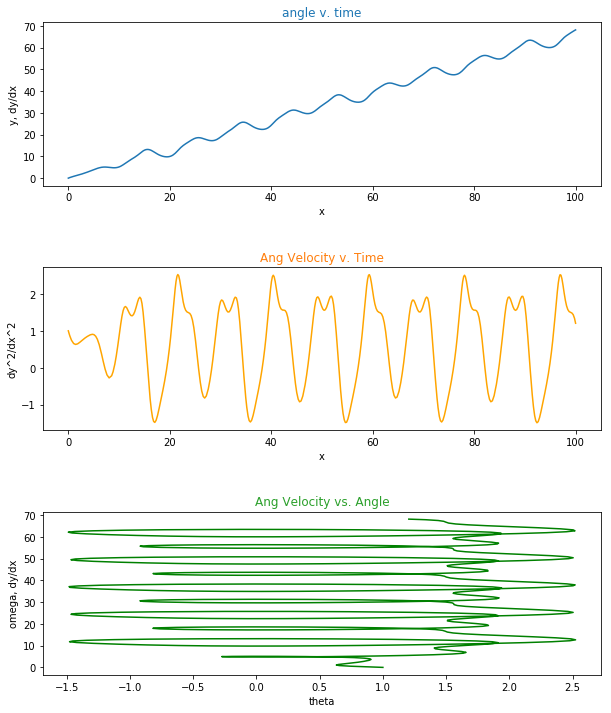

In [31]:
f, axarr = plt.subplots(3,1, figsize=(10,12))

axarr[0].plot(x, y[:,0], '-', label='y(x)')

axarr[0].set_xlabel('x')
axarr[0].set_ylabel('y, dy/dx')
axarr[0].set_title('angle v. time', color='C0')
axarr[0].axis()
#axarr[0].set_aspect(100)

axarr[1].plot(x, y[:,1], '-', color='orange', label='dydx(x)')
axarr[1].set_xlabel('x')
axarr[1].set_ylabel('dy^2/dx^2')
axarr[1].set_title('Ang Velocity v. Time', color='C1')

axarr[2].plot(y[:,1], y[:,0], '-', color='green', label='omega(theta)')

axarr[2].set_xlabel('theta')
axarr[2].set_ylabel('omega, dy/dx')
axarr[2].set_title('Ang Velocity vs. Angle', color='C2')

f.subplots_adjust(wspace = 1.0)
#fig = plt.figure(figsize = (6,6))

plt.subplots_adjust(hspace=0.5)

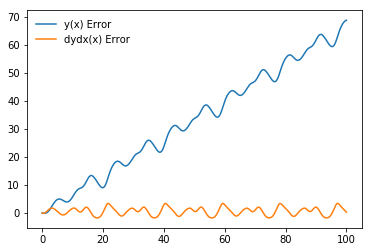

In [32]:
sine = np.sin(x) 
cosine = np.cos(x)

y_error = (y[:,0] - sine)
dydx_error = (y[:,1] - cosine)

plt.plot(x, y_error, label="y(x) Error")
plt.plot(x, dydx_error, label="dydx(x) Error")
plt.legend(frameon=False)